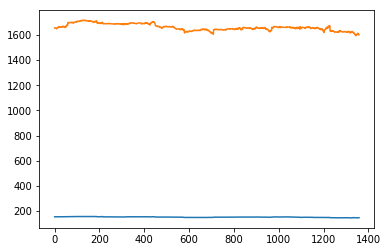

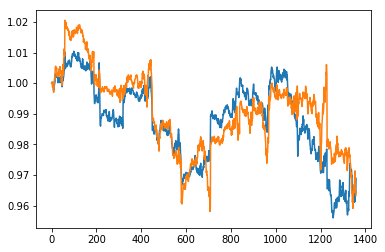

In [31]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr

import statsmodels
import statsmodels.api as sm

df_aapl = pandas.read_excel('aapl.xlsx')

df_amzn = pandas.read_excel('amzn.xlsx')

close_aapl = df_aapl['Close']
close_amzn = df_amzn['Close']


plt.plot(close_aapl)
plt.plot(close_amzn)
plt.show()

plt.plot(close_aapl/(close_aapl.cumsum()/np.ones(len(close_aapl)).cumsum()))
plt.plot(close_amzn/(close_amzn.cumsum()/np.ones(len(close_amzn)).cumsum()))
plt.show()


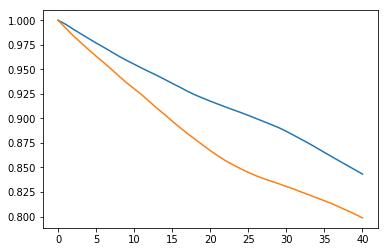

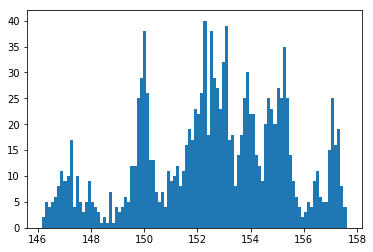

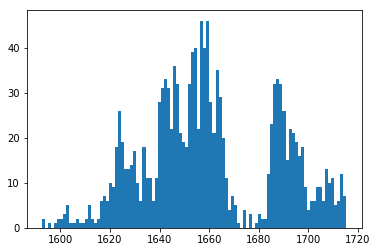

In [32]:


acf_aapl = statsmodels.tsa.stattools.acf(close_aapl)
acf_amzn = statsmodels.tsa.stattools.acf(close_amzn)

# https://www.statsmodels.org/dev/_modules/statsmodels/tsa/stattools.html#acf

plt.plot(acf_aapl)
plt.plot(acf_amzn)

plt.show()

h_aapl = plt.hist(close_aapl, bins = 100)
plt.show()

h_amzn = plt.hist(close_amzn, bins = 100)
plt.show()

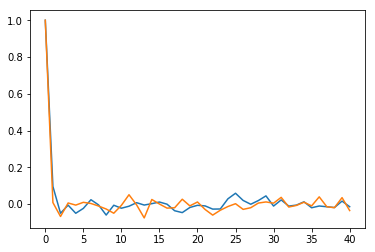

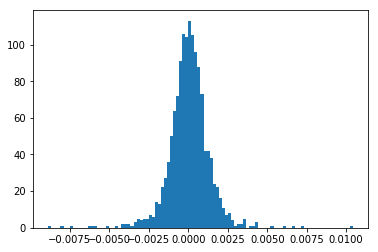

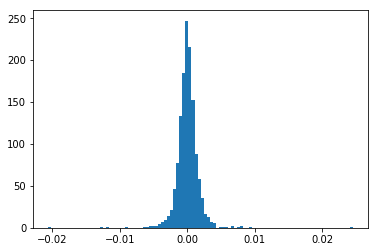

In [34]:
r_aapl = close_aapl[:-1] / close_aapl[1:].values - 1

r_amzn = close_amzn[:-1] / close_amzn[1:].values - 1


acf_aapl = statsmodels.tsa.stattools.acf(r_aapl)
acf_amzn = statsmodels.tsa.stattools.acf(r_amzn)

plt.plot(acf_aapl)
plt.plot(acf_amzn)

plt.show()

h_aapl = plt.hist(r_aapl, bins = 100)
plt.show()

h_amzn = plt.hist(r_amzn, bins = 100)
plt.show()

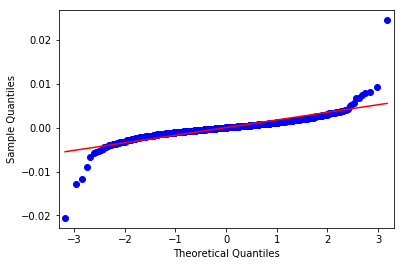

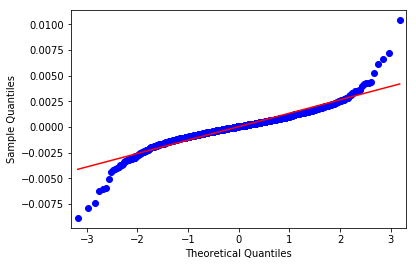

In [35]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(r_amzn, line='s')
pyplot.show()



# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(r_aapl, line='s')
pyplot.show()

In [36]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)

# generate univariate observations
# normality test
stat, p = shapiro(r_amzn)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

    
# generate univariate observations
# normality test
stat, p = shapiro(r_aapl)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.768, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.913, p=0.000
Sample does not look Gaussian (reject H0)


In [37]:
#Rejecting the null hypothesis means that the process has no unit root, 
#and in turn that the time series is stationary or does not have time-dependent structure.

result = statsmodels.tsa.stattools.adfuller(close_amzn)


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

    
result = statsmodels.tsa.stattools.adfuller(close_aapl)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.194307
p-value: 0.676040
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
ADF Statistic: -1.023243
p-value: 0.744693
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [38]:
result = statsmodels.tsa.stattools.adfuller(r_amzn)


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

    
result = statsmodels.tsa.stattools.adfuller(r_aapl)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -27.697684
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
ADF Statistic: -19.265808
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
